In [193]:
#libarys
#using APIs from twitter and reddit
#Doing some scarping from google and yahoo finance
#using pandas and seaborn
#
#
#
#NLTK Vader
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
#Sentiment Analysis of Social Media Text. Eighth International Conference on
#Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

import pandas as pd
import seaborn as sbn
from datetime import datetime as dt
import re 
import matplotlib.pyplot as plt

import socialdata as social
from stockdata import Stockdata as stock 
from datacleaner import Cleaner

%matplotlib inline
sbn.set()

In [217]:
#default variables
clean = Cleaner()
key = 'Apple'
ticker = 'AAPL'.upper()
subreddit = 'finance'

start_t = dt(2001,2,1) #date to start the stock data and end
end_t = dt.now() 

reads = social.Socialmedia(subreddit=subreddit,limit=30,keywords=key)
scraper = social.Webscraper()
#xmlRead = scraper.scrapexml()
redditRead = reads.reddit()
twitterRead = reads.twitter()
newsRead = scraper.scrapenews(keywords=key)


In [195]:
twitter = clean.social_cleaner(twitterRead)
reddit = clean.social_cleaner(redditRead)
#xmlr = clean.social_cleaner(xmlRead, source='xml')
newsr = clean.social_cleaner(newsRead)

listofdb = [twitter,reddit,newsr]
finaldb = pd.concat(listofdb)
finaldb.sort_index(inplace=True)

In [196]:
stockKey = stock(stockname=ticker, startfrom=start_t, endto=end_t, save='yes')
tickerData = stockKey.stockdata()
tickerData.dropna(inplace=True)

cleanPrice = tickerData.shift(-1, axis=0)
cleanPrice = tickerData.reindex(finaldb.index,method='backfill')
cleanPrice = cleanPrice[~cleanPrice.reset_index().duplicated().values]

stockdf = pandas.merge(finaldb,cleanPrice['Close'], left_index=True,right_index=True)
stockdf.dropna(inplace=True)

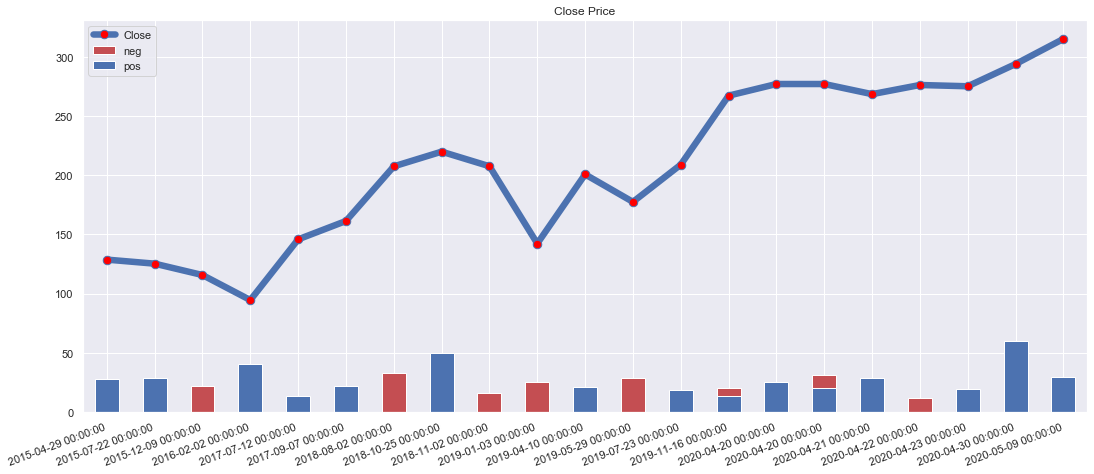

In [216]:
plts = stockdf['Close'].plot(kind='line',
                            linewidth=6.5,
                            use_index=False,
                            marker="o",
                            markersize=8.5,
                            markerfacecolor='red',
                            legend='Closing Price',
                            title='Close Price',
                            figsize=(18,8))

neg = stockdf['neg'].plot(kind='bar',
                          legend='POSvalues',
                          color='r')

pos=stockdf['pos'].plot(kind='bar',
                        legend='NEG values')

plt.tick_params(axis="x", direction='out', labelrotation=20.5)
plt.legend();
plt.show()
